### LSTM을 사용한 IMDB
--------------------
IMDB 데이터셋: 케라스에 포함되어있는 데이터셋으로 인터넷 영화의 데이터베이스로부터 가져온 양극단의 리뷰 5만개로 이루어진 데이터셋

IMDB 데이터 특징

    1) 전처리되어 있어 각 리뷰가 숫자 시퀀스로 변환되어 있음
    2) 각 숫자는 사전에 있는 고유한 단어를 나타냄
    3) 훈련 데이터 2만 5천개와 테스트 데이터 2만 5천개로 나뉨
    4) 각각 50%는 긍정, 50%는 부정으로 구성

--------------------

- LSTM (순환 신경망) : 이전 스텍의 출력값이 다시 입력으로 연결되는 신경망을 순환 신경망이라 하는데 RNN에서의 기울기 소실을 보안한 신경망

- CNN (합성곱 신경망) : 입력층, 출력층 가운데 중간층에 합성곱층과 풀링층을 둔 신경망으로 다차원 배열을 통해 데이터를 처리

- CNN과 LSTM을 이용한 모델

In [16]:
#IMDB와 CNN, LSTM을 포함한 필요 패키지들 임포트
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout, Activation
from keras.preprocessing import sequence
from keras.layers import Conv1D, MaxPooling1D
from keras.utils import np_utils

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

maxfeatures = 5000
maxword = 100

# 훈련, 시험셋을 불러옴
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=maxfeatures)

In [17]:
# 훈련, 시험셋 구분
x_train = sequence.pad_sequences(x_train, maxword)
x_test = sequence.pad_sequences(x_test, maxword)

In [18]:
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64,5, padding= 'valid', activation='relu', strides=1)) #CNN모델!
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(50)) #추가적으로 LSTM모델!
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary() #summary출력

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                23000     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total para

In [19]:
# 모델을 학습하기 위해 과정을 정하고
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 25에포크로 모델 학습을 시작
history = model.fit(x_train, y_train, epochs=25, batch_size=100, validation_data=(x_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/25
25000/25000 [==============================] - 92s 4ms/step - loss: 0.4627 - acc: 0.7598 - val_loss: 0.3456 - val_acc: 0.8493
Epoch 2/25
25000/25000 [==============================] - 82s 3ms/step - loss: 0.2910 - acc: 0.8783 - val_loss: 0.3225 - val_acc: 0.8582
Epoch 3/25
25000/25000 [==============================] - 85s 3ms/step - loss: 0.2461 - acc: 0.8996 - val_loss: 0.3310 - val_acc: 0.8594
Epoch 4/25
25000/25000 [==============================] - 85s 3ms/step - loss: 0.2141 - acc: 0.9159 - val_loss: 0.3386 - val_acc: 0.8564
Epoch 5/25
25000/25000 [==============================] - 83s 3ms/step - loss: 0.1816 - acc: 0.9310 - val_loss: 0.3885 - val_acc: 0.8458
Epoch 6/25
25000/25000 [==============================] - 85s 3ms/step - loss: 0.1500 - acc: 0.9442 - val_loss: 0.3868 - val_acc: 0.8491
Epoch 7/25
25000/25000 [==============================] - 84s 3ms/step - loss: 0.1230 - acc: 0.9557 - val_loss: 0.4614 - val_acc

In [20]:
#시험 정확도는?
print("\n 정확도는 %.4f 입니다" % (model.evaluate(x_test, y_test)[1]))

#시험셋의 오차
y_vloss = history.history['val_loss']

#훈련셋의 오차
y_loss = history.history['loss']

25000/25000 [==============================] - 19s 749us/step

 정확도는 0.8367 입니다


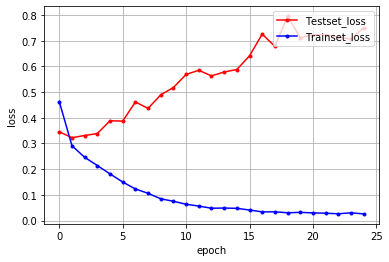

In [21]:
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")

#레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [22]:
# 모델 평가
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('- 평가결과는?! -')
print(loss_and_metrics)

25000/25000 [==============================] - 16s 646us/step
- 평가결과는?! -
[0.7509881188011169, 0.836720000038147]
